In [1]:
from src.data.x4_preprocess_batch_images import *

In [2]:
import numpy as np
import skimage as ski
import os
from matplotlib import pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from math import sqrt


In [3]:
def plot_3c_tif(image):
    print ('Shape: ', image.shape)
    print ('Type:', type(image))
    print ('Dtype:', image.dtype)

    fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = (30,10))
    ax0.imshow(image[...,0])
    ax1.imshow(image[...,1])
    ax2.imshow(image[...,2])

    return fig

In [4]:
def plot_otsu(image):
    thresh = ski.filters.threshold_otsu(tcells)
    binary = tcells > thresh


    fig, axes = plt.subplots(ncols = 3, figsize = (30, 10))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


    ax[0].imshow(tcells)
    ax[0].set_title('Original Z Max Project')
    ax[0].axis('off')

    ax[1].hist(tcells.ravel(), bins = 256) 
    ax[1].set_title('Histogram')
    ax[1].axvline(thresh, color = 'r')

    ax[2].imshow(binary) 
    ax[2].set_title('Thresholded')
    ax[2].axis('off')

    return 

In [5]:
def run_log(image, plot_im = False, ms=30, ns=10, thresh=.1, verbose = False):
    
    if verbose == True:
        print('Max Sigma =', ms)
        print('Num Sigma =', ns)
        print('Threshold =', thresh)
    
    # Find blobs with Laplacian of Gaussian
    blobs_log = blob_log(image, max_sigma = ms , num_sigma = ns, threshold = thresh)

    # Compute radii in the 3rd column.
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
    
    if plot_im == True:
        # Generate figure to check accuracy
        fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
        ax0.imshow(image)
        ax1.imshow(image)
        for blob in blobs_log:
            y, x, r = blob
            c = plt.Circle((x, y), r, color='r', linewidth=2, fill=False)
            ax1.add_patch(c)
        plt.tight_layout()
        plt.show()
        return fig, blobs_log

    # Return fig and blobs_log for counting blobs
    return blobs_log

In [6]:
class cell_counts:

    def __init__(self, name, image, blobs):
        self.name = name 
        self.image = image
        # self.overlay = overlay
        self.blobs = blobs[blobs[:,2] > 2]
    
    def num_cells(self):
        return len(self.blobs)
    
    def overlay(self, return_fig = False):
        fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
        ax0.imshow(self.image)
        ax1.imshow(self.image)
        for blob in self.blobs:
            y, x, r = blob
            c = plt.Circle((x, y), r, color='r', linewidth=2, fill=False)
            ax1.add_patch(c)
        plt.tight_layout()
        plt.show()
        if return_fig == True:
            return fig
        else:
            return

    def area(self, pixels_per_micron = 1.5):
        microns_per_pixel = 1/pixels_per_micron
        return self.image.shape[0] * self.image.shape[1] * microns_per_pixel**2
    
    def cells_per_area(self, pixels_per_micron = 1.5):
         microns_per_pixel = 1/pixels_per_micron
         area = self.image.shape[0] * self.image.shape[1] * microns_per_pixel**2
         cells_per_area = len(self.blobs)/area 
         return cells_per_area 
        

In [9]:
def collect_cell_counts(image_directory, mouse_name = 'mouse_x_'):
    images = ski.io.ImageCollection(os.path.join(image_directory, '*.tif'))
    counted = []
    for i, image in enumerate(images):
        print('Current index:', i) 
        image8 = ski.img_as_ubyte(image[...,1])
        blobs_log = run_log(image8, plot_im = False, ms = 30, ns = 10, thresh = 0.1)

        # Assign the mosue name plus index to the class object containing its data
        #exec(mouse_name + "%s = %s" % (i, str(cell_counts(images.files[i], image8, blobs_log))))

        # Append mouse data class object to list to return back to user 
        #exec("counted.append(" + mouse_name + "%s)" % i)

        counted.append(cell_counts(images.files[i], image8, blobs_log))

    return counted

In [10]:
m1613__dir = 'data/interim/compare_AC_10.21.19_Iba1_GFAP_X4_1613E/'

m1613_compare_counts = collect_cell_counts(m1613__dir)

Current index: 0
Current index: 1
Current index: 2
Current index: 3
Current index: 4
Current index: 5
Current index: 6
Current index: 7
Current index: 8
Current index: 9
Current index: 10
Current index: 11
Current index: 12
Current index: 13
Current index: 14
Current index: 15
Current index: 16
Current index: 17
Current index: 18
Current index: 19
Current index: 20
Current index: 21
Current index: 22
Current index: 23
Current index: 24
Current index: 25
Current index: 26
Current index: 27
Current index: 28
Current index: 29
Current index: 30
Current index: 31
Current index: 32
Current index: 33
Current index: 34
Current index: 35
Current index: 36
Current index: 37
Current index: 38
Current index: 39
Current index: 40


In [11]:
m1616_dir = 'data/interim/compare_AC_10.22.19_Iba1_GFAP_X4_1616E'

m1616_compare_counts = collect_cell_counts(m1616_dir)

Current index: 0
Current index: 1
Current index: 2
Current index: 3
Current index: 4
Current index: 5
Current index: 6
Current index: 7
Current index: 8
Current index: 9
Current index: 10
Current index: 11
Current index: 12
Current index: 13
Current index: 14
Current index: 15
Current index: 16
Current index: 17
Current index: 18
Current index: 19
Current index: 20
Current index: 21
Current index: 22
Current index: 23
Current index: 24
Current index: 25
Current index: 26
Current index: 27
Current index: 28
Current index: 29
Current index: 30
Current index: 31
Current index: 32
Current index: 33
Current index: 34
Current index: 35
Current index: 36
Current index: 37
Current index: 38
Current index: 39
Current index: 40
Current index: 41
Current index: 42
Current index: 43
Current index: 44
Current index: 45
Current index: 46
Current index: 47
Current index: 48


In [14]:
for i in range(len(m1613_compare_counts)):
    print ("Index =", i)
    print ("Image Name:",  os.path.basename(m1613_compare_counts[i].name))
    print ("Number of cells =", m1613_compare_counts[i].num_cells())
    #print ("Blobs:")
    #print (m1613_collection[i].blobs)
    print ("")

Index = 0
Image Name: 1613E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_1_DG.tif
Number of cells = 27

Index = 1
Image Name: 1613E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_2_DG.tif
Number of cells = 30

Index = 2
Image Name: 1613E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_3_DG.tif
Number of cells = 32

Index = 3
Image Name: 1613E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_4_DG.tif
Number of cells = 39

Index = 4
Image Name: 1613E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_5_DG.tif
Number of cells = 27

Index = 5
Image Name: 1613E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_6_CA3.tif
Number of cells = 29

Index = 6
Image Name: 1613E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_7_CA3.tif
Number of cells = 33

Index = 7
Image Name: 1613E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_8_CA2.tif
Number of cells = 35

Index = 8
Image Name: 1613E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_9_CA1.CA2.tif
Number of cells = 47

Index = 9
Image Name

In [15]:
for i in range(len(m1616_compare_counts)):
    print ("Index =", i)
    print ("Image Name:",  os.path.basename(m1616_compare_counts[i].name))
    print ("Number of cells =", m1616_compare_counts[i].num_cells())
    #print ("Blobs:")
    #print (m1613_collection[i].blobs)
    print ("")

Index = 0
Image Name: 1616E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_1_DG.tif
Number of cells = 37

Index = 1
Image Name: 1616E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_2_DG.tif
Number of cells = 27

Index = 2
Image Name: 1616E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_3_DG.tif
Number of cells = 15

Index = 3
Image Name: 1616E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_4_DG.tif
Number of cells = 16

Index = 4
Image Name: 1616E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_5_DG.tif
Number of cells = 8

Index = 5
Image Name: 1616E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_6_CA3.tif
Number of cells = 10

Index = 6
Image Name: 1616E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_7.tif
Number of cells = 0

Index = 7
Image Name: 1616E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_8_CA2.tif
Number of cells = 26

Index = 8
Image Name: 1616E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_9_CA2.tif
Number of cells = 35

Index = 9
Image Name: 1616E_GF

data/interim/compare_AC_10.21.19_Iba1_GFAP_X4_1613E\1613E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_7_CA3.tif


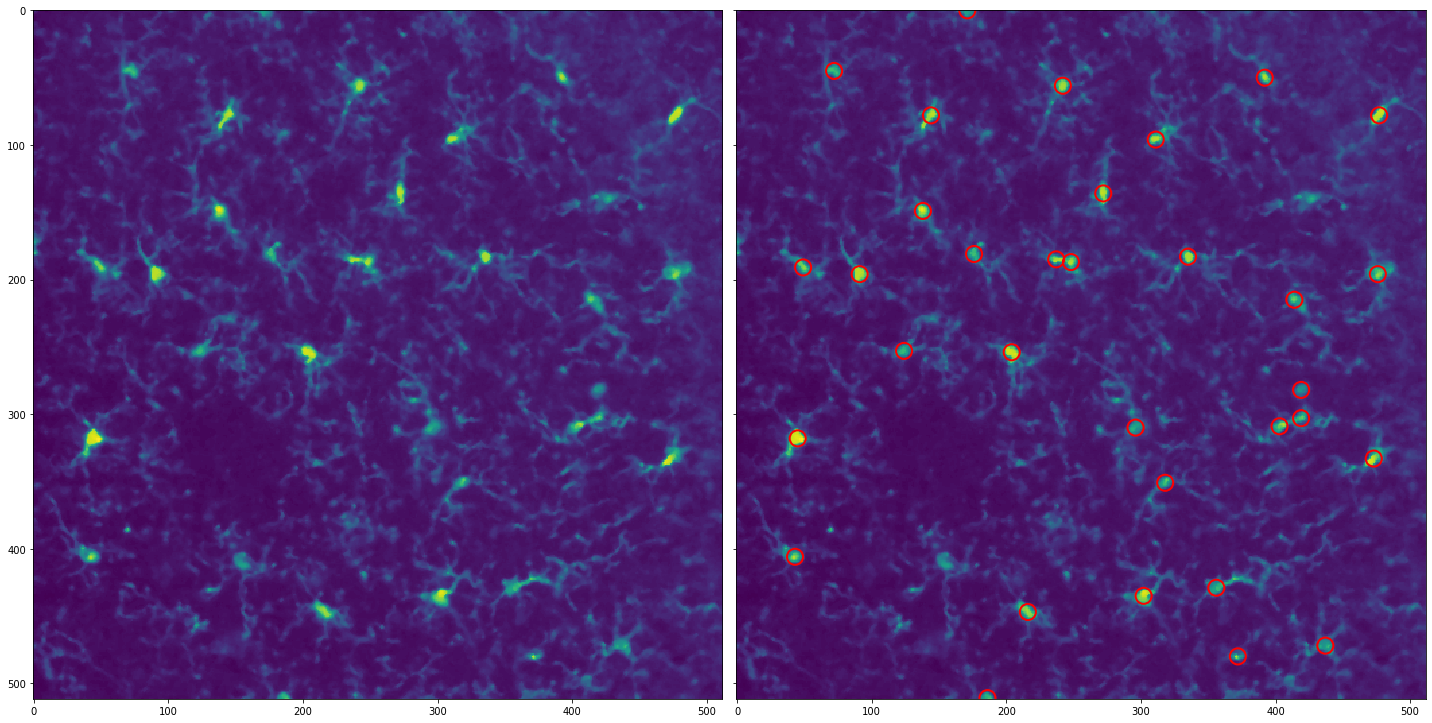

In [24]:
print(m1613_compare_counts[6].name)
m1613_compare_counts[6].overlay()

In [25]:
def show_all(collection):
    for i in range(len(collection)):
        print ("Index =", i)
        print ("Image Name:",  os.path.basename(collection[i].name))
        print ("Number of cells =", collection[i].num_cells())
        plt.show(collection[i].overlay())
        print ("")

In [34]:
def ex1(collection, i):
    print ("Index =", i)
    print ("Image Name:",  os.path.basename(collection[i].name))
    print ("Number of cells =", collection[i].num_cells())
    plt.show(collection[i].overlay())
    print ("")

Index = 0
Image Name: 1613E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_1_DG.tif
Number of cells = 27


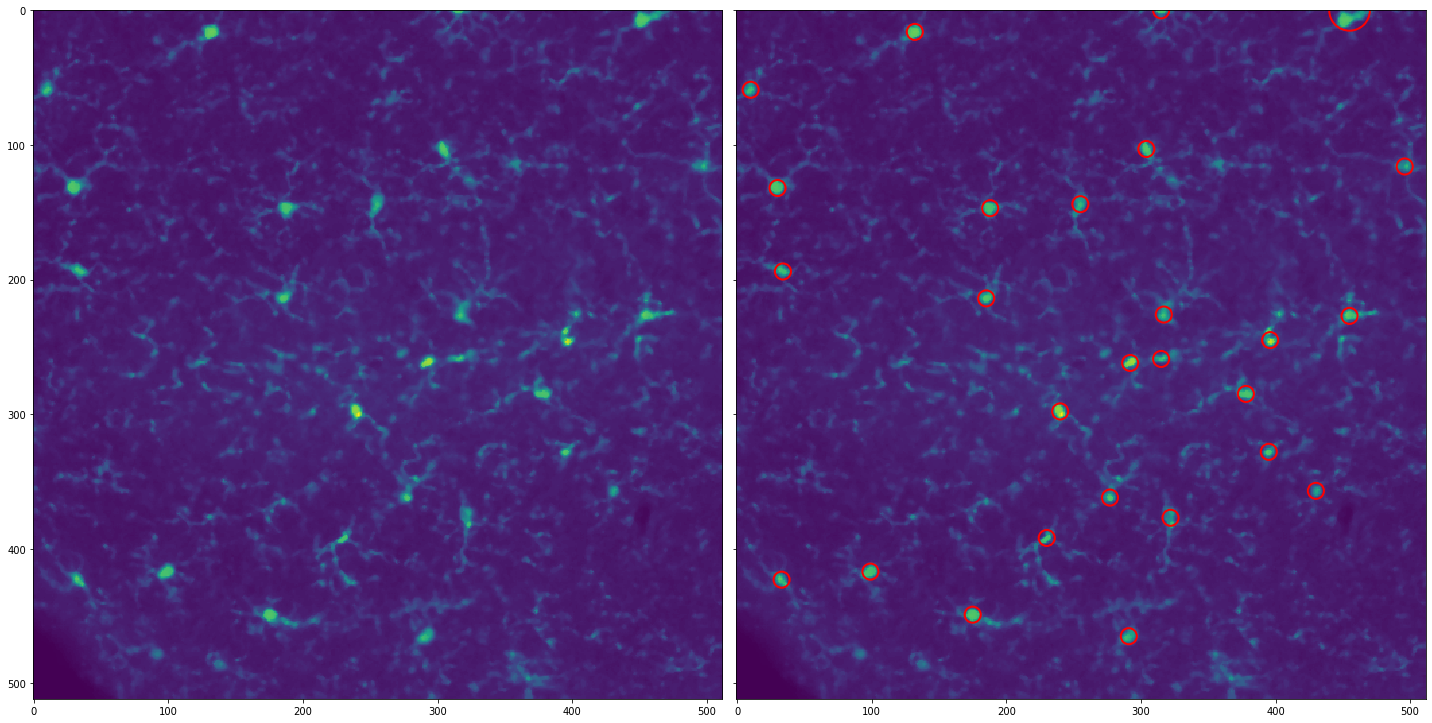

TypeError: show() got an unexpected keyword argument 'figsize'

In [33]:
ex1(m1613_compare_counts, 1)

Index = 29
Image Name: 1616E_Section2_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_7.tif
Number of cells = 5



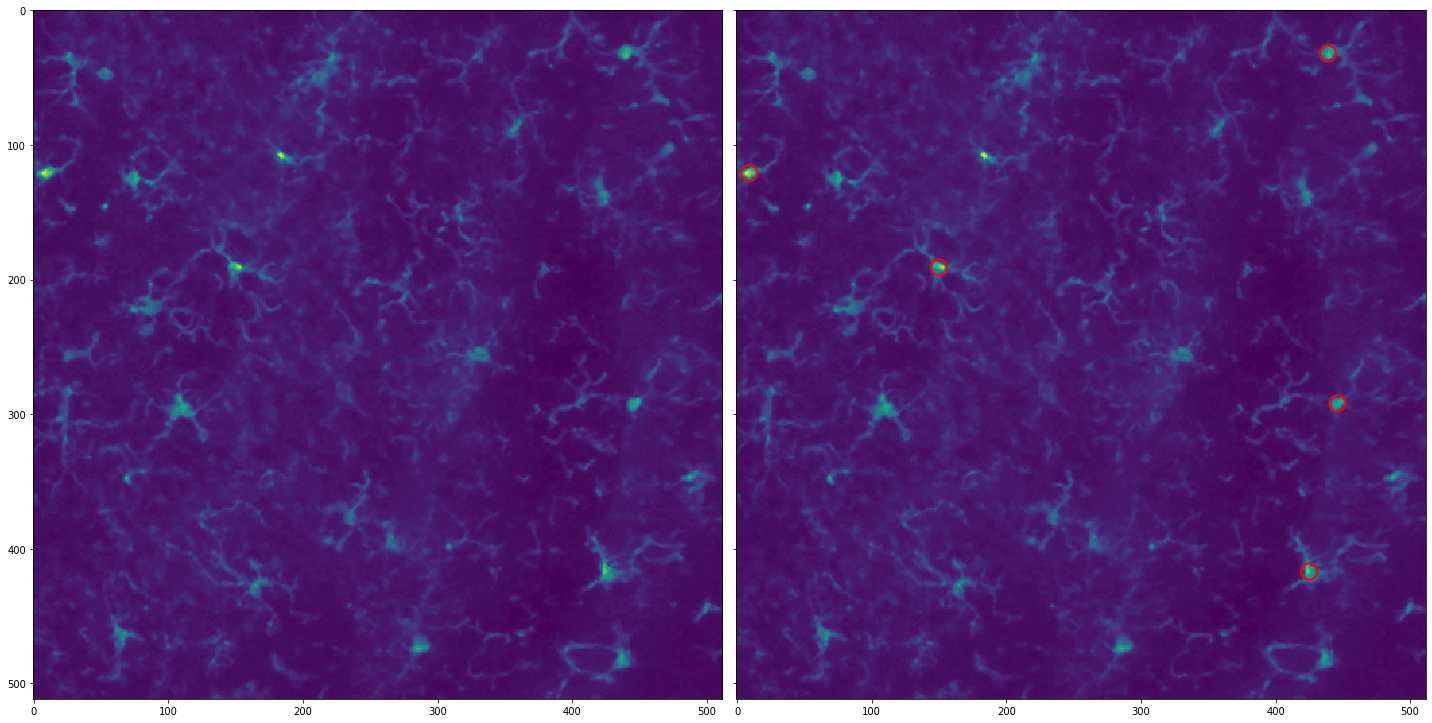

In [43]:
ex1(m1616_compare_counts, 29)

In [17]:
import pickle
PIK = "m1616_compare_counts_pickle.dat"

with open(PIK, "wb") as f:
    pickle.dump(m1616_compare_counts,f)


In [101]:
with open(PIK, "rb") as f: 
    x = pickle.load(f)

In [18]:
PIK = "m1613_compare_counts_pickle.dat"

with open(PIK, "wb") as f:
    pickle.dump(m1613_compare_counts,f)

Shape:  (512, 512, 3)
Type: <class 'numpy.ndarray'>
Dtype: uint16


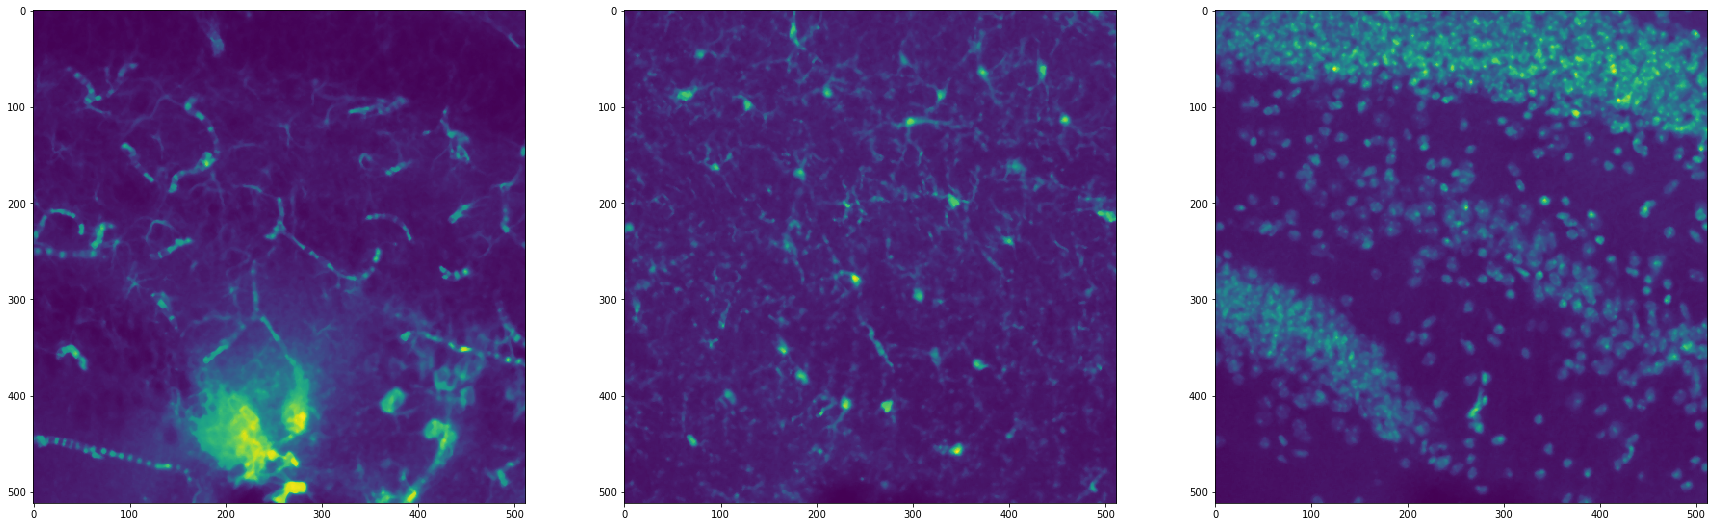

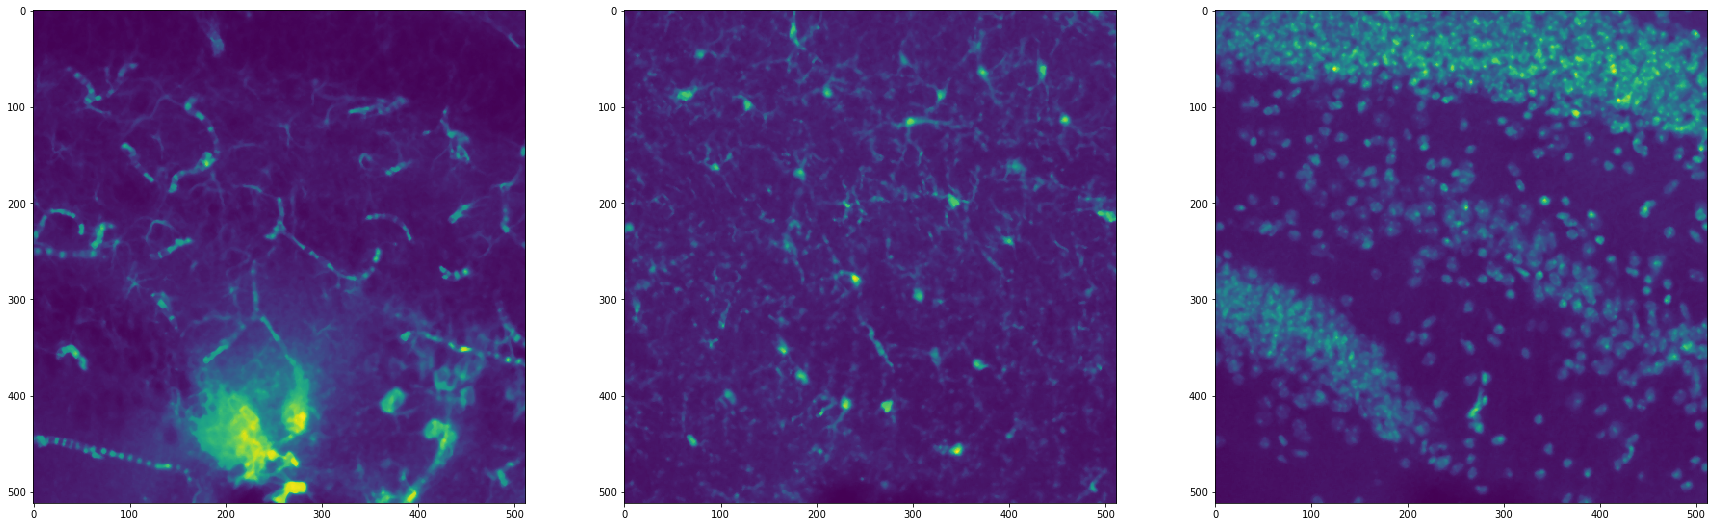

In [22]:
m1613__dir = 'data/interim/compare_AC_10.21.19_Iba1_GFAP_X4_1613E/'
images = ski.io.ImageCollection(os.path.join(m1613__dir, '*.tif'))
plot_3c_tif(images[24])

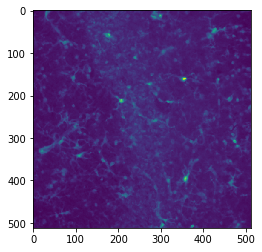

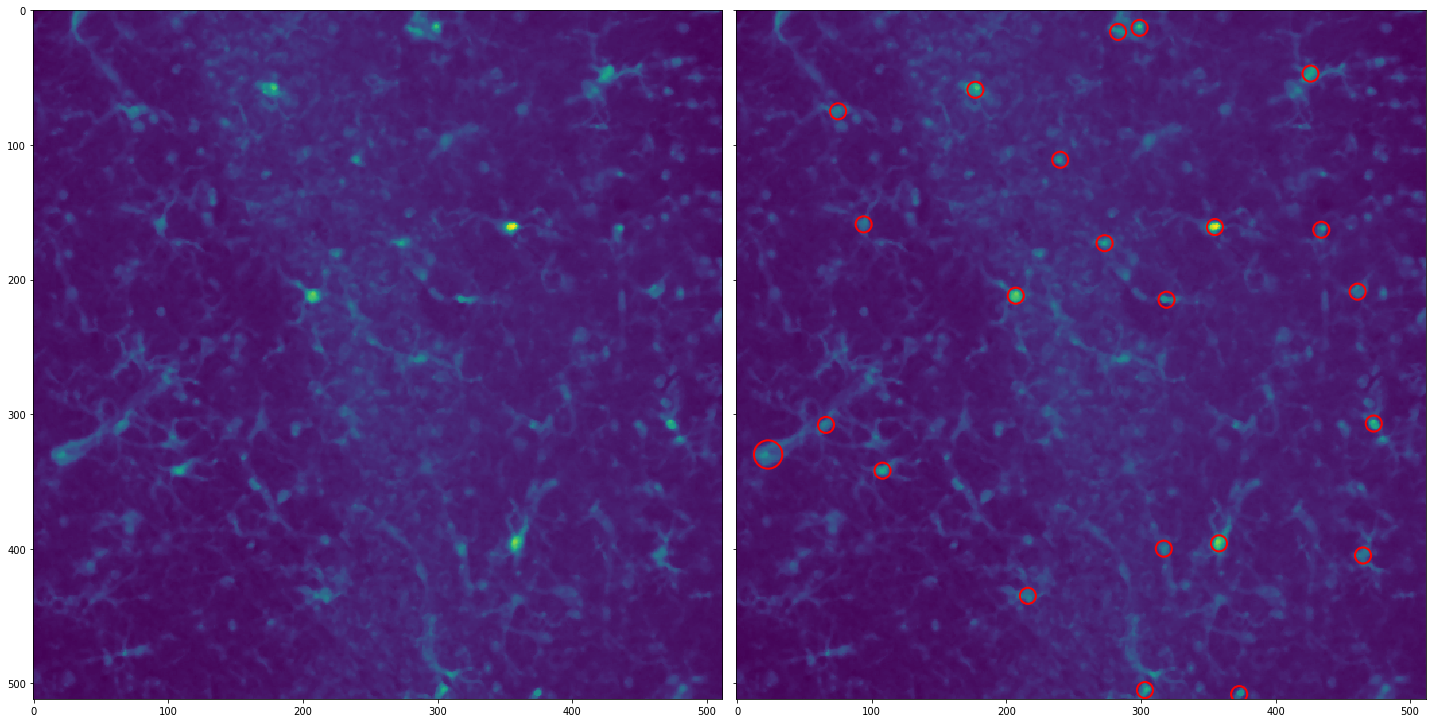

In [42]:
CA3_7 = ski.io.imread("Z:/~CODE~/X4 Iba1 Cell Counting Repo/data/interim/compare_AC_10.22.19_Iba1_GFAP_X4_1616E/1616E_GFAP.1.1000_Iba1.1.1000_10.21.19_20x_zStack_10um_7.tif")

plt.imshow(CA3_7)
CA3_7.shape

x = run_log(CA3_7, plot_im = True, ms=30, ns=10, thresh=.1, verbose = False)